### Introduction
In the world of HR, attrition is the topic driving a lot of attentions, especially in large companies. As a Data Scientist and Consultant focusing on internal issues within a corporate, I can speak of how much investments were made in improving company attrition rate. As a result, I propose a project with a focus on attrition of a large US company. The goal of this project is to practice extensive Exploratory Data Analysis, provide actionable recommendations and make predictions. 
EDA part is the backbone of the project as it helps with understanding the story behind the data. If I have sufficient time, I would drill down the data until I find interesting insights that will give me a better understanding of my data. After obtaining a comprehensive understanding of the data, we could draw some recommendations like how can the organization reduce the rate of attrition inside the company? In my opinion, this is the most important part of the analysis because it gives us a better understanding of what the organization could do to avoid the negative effect of attrition. To help HR with planning, we will implement a predictive model to determine whether an employee is going to quit or not.

In [246]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [247]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1. Exploratory Data Analysis

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [249]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [250]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feature
data = data.drop(columns=['StandardHours', 'EmployeeCount', 'Over18','EmployeeNumber'])

In [251]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:30s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

Age                               43	 [18, 19, 20, 21, 22]
Attrition                          2	 [0, 1]
BusinessTravel                     3	 ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
DailyRate                        886	 [102, 103, 104, 105, 106]
Department                         3	 ['Human Resources', 'Research & Development', 'Sales']
DistanceFromHome                  29	 [1, 2, 3, 4, 5]
Education                          5	 [1, 2, 3, 4, 5]
EducationField                     6	 ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other']
EnvironmentSatisfaction            4	 [1, 2, 3, 4]
Gender                             2	 ['Female', 'Male']
HourlyRate                        71	 [30, 31, 32, 33, 34]
JobInvolvement                     4	 [1, 2, 3, 4]
JobLevel                           5	 [1, 2, 3, 4, 5]
JobRole                            9	 ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director']
JobSatisfac

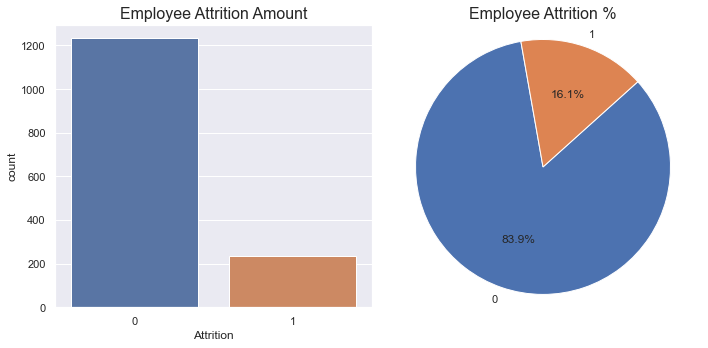

In [252]:
# Target distribution
Target_group = data.Attrition.value_counts().reset_index()
Target_group['Percent'] = Target_group.Attrition / Target_group.Attrition.sum()
sns.set(font_scale=1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
sns.countplot(x='Attrition', data=data, ax=ax[0])
ax[0].set_title("Employee Attrition Amount", fontsize=16)
ax[1].pie(Target_group.Attrition, labels=Target_group.index, autopct='%1.1f%%', startangle=100)
ax[1].axis('equal')
ax[1].set_title("Employee Attrition %", fontsize=16)
plt.tight_layout()
plt.show()

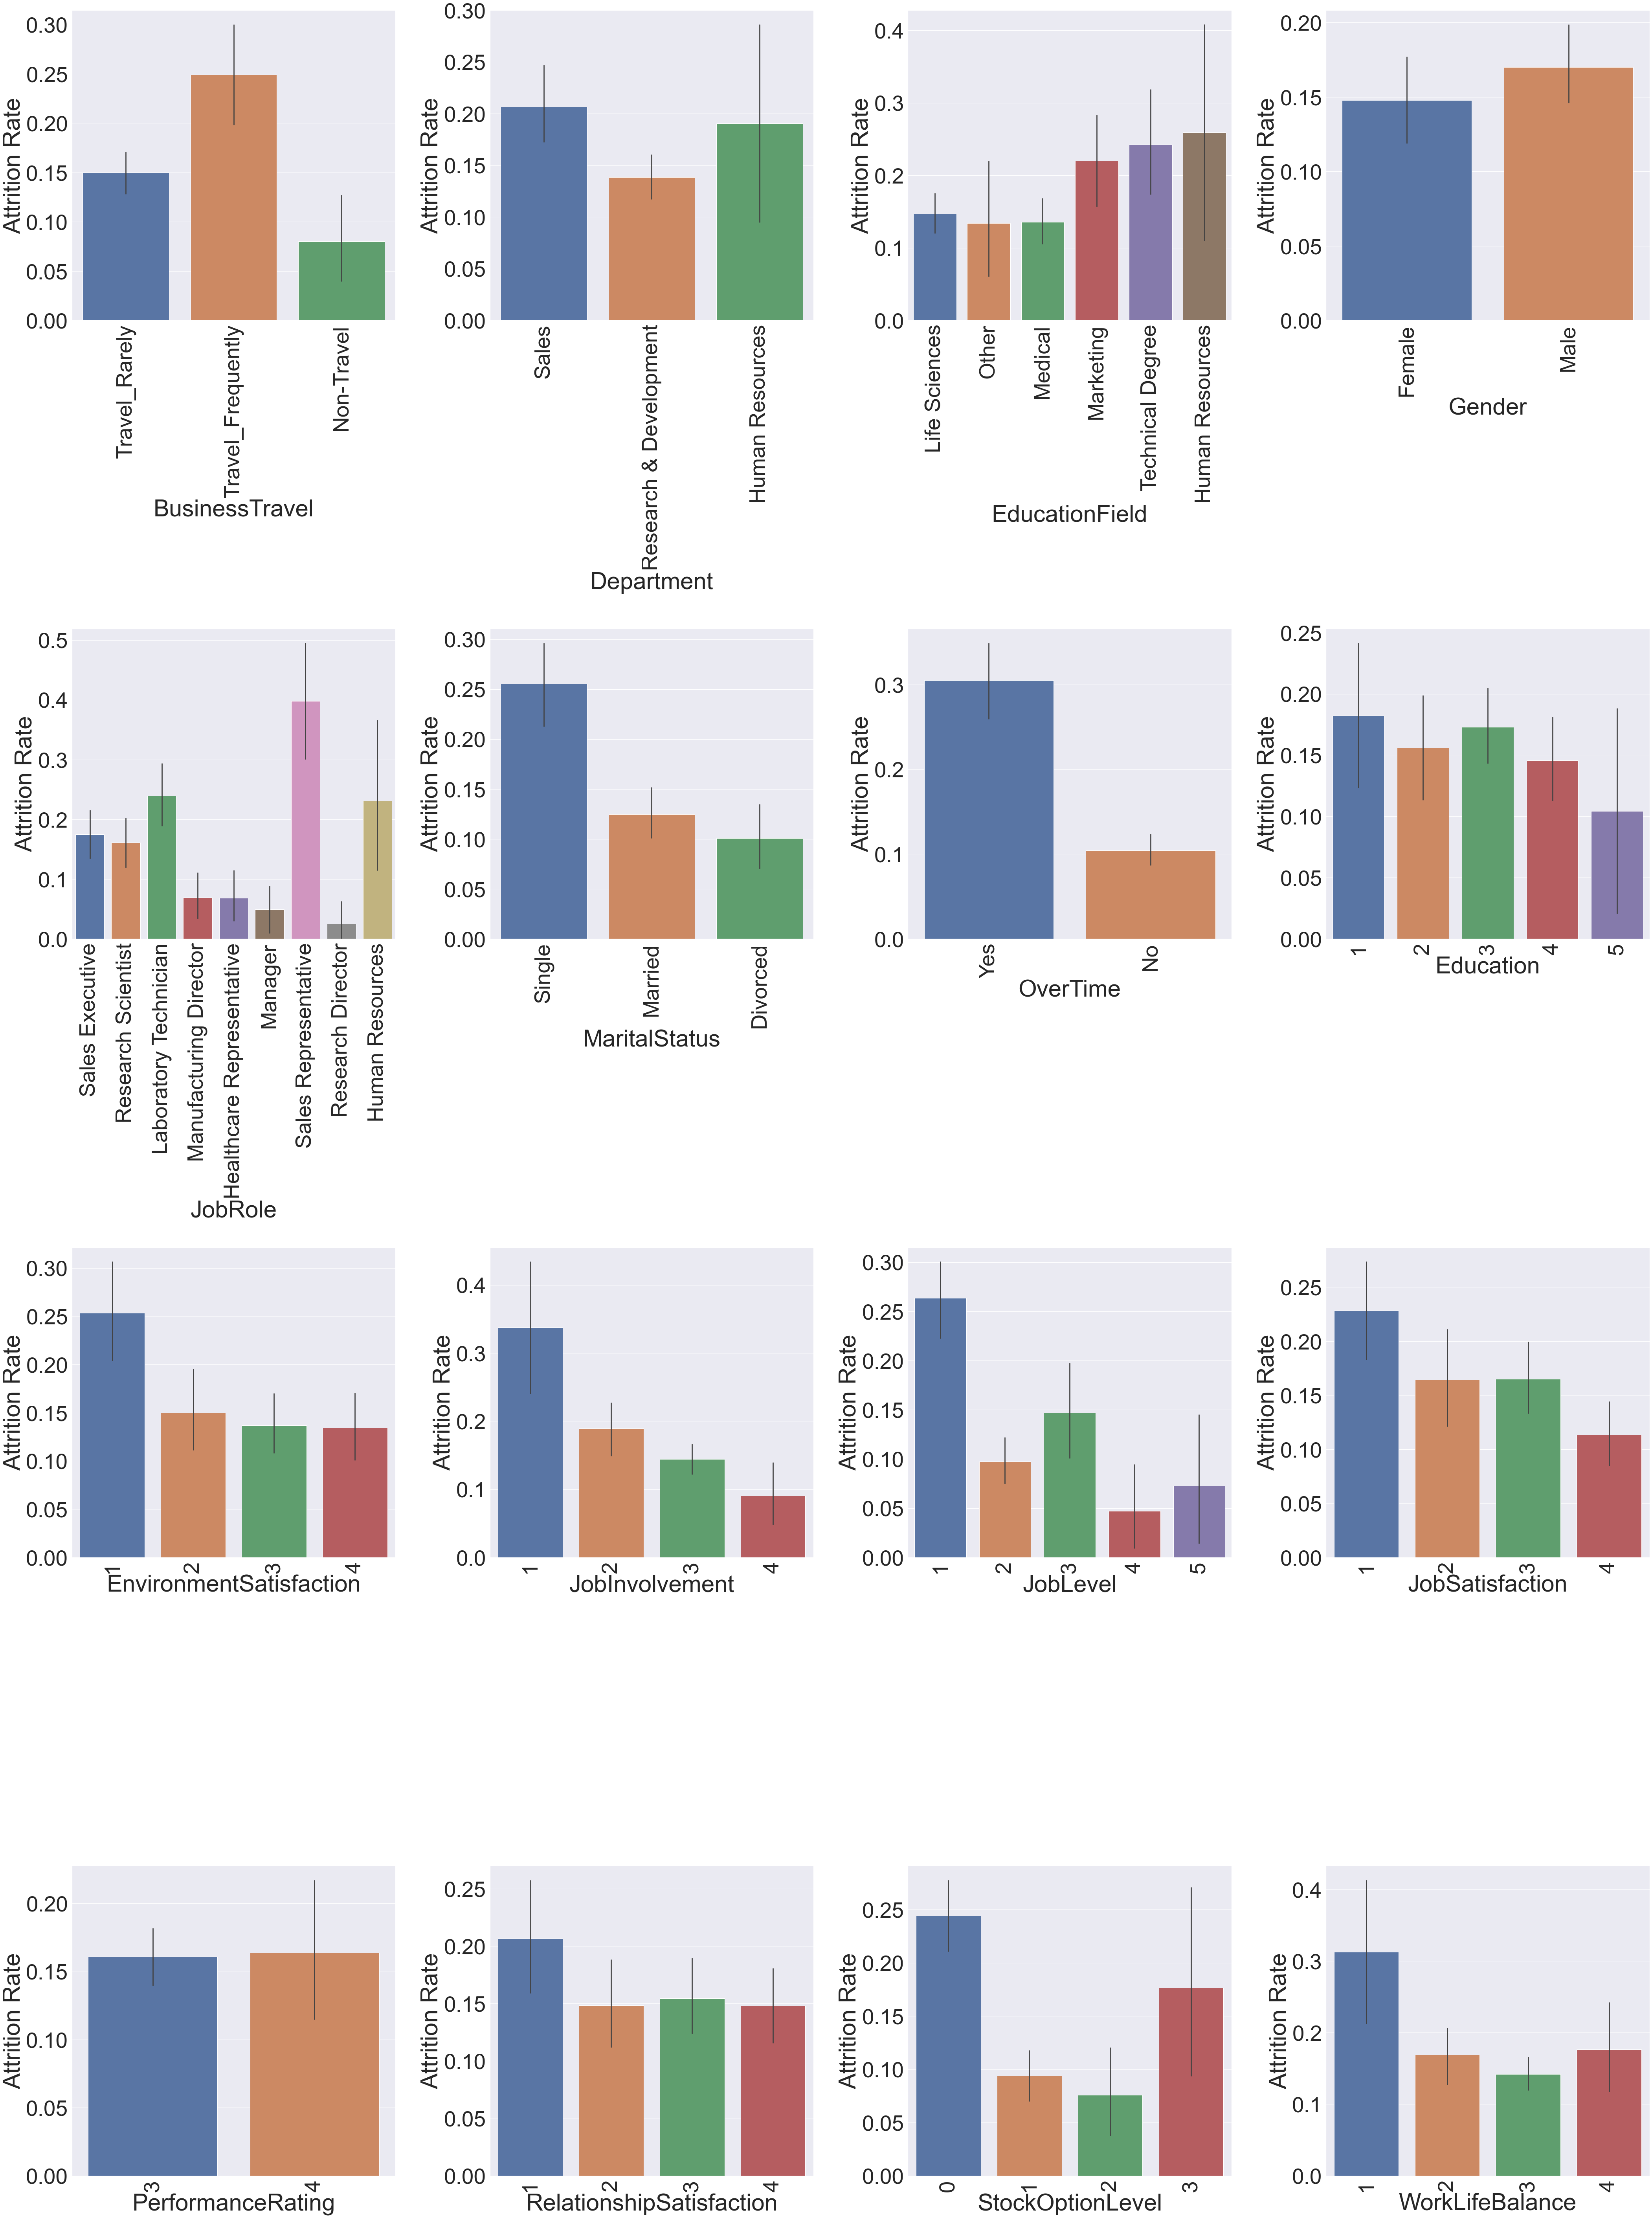

In [166]:
# Feature Distribution
# Visualize categorical data and how they correlate with Attrition
# Get categorical columns
cat_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 20:
        cat_col.append(column)
# Append some columns that are better counted as categorical columns
cat_col.extend(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 
                'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 
               'StockOptionLevel', 'WorkLifeBalance'])
sns.set(font_scale=5)
plt.figure(figsize=(60, 80))

for i, column in enumerate(cat_col, 1):
    plt.subplot(4, 4, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Rate')
    plt.xlabel(f'{column}')  
plt.tight_layout()
plt.show()

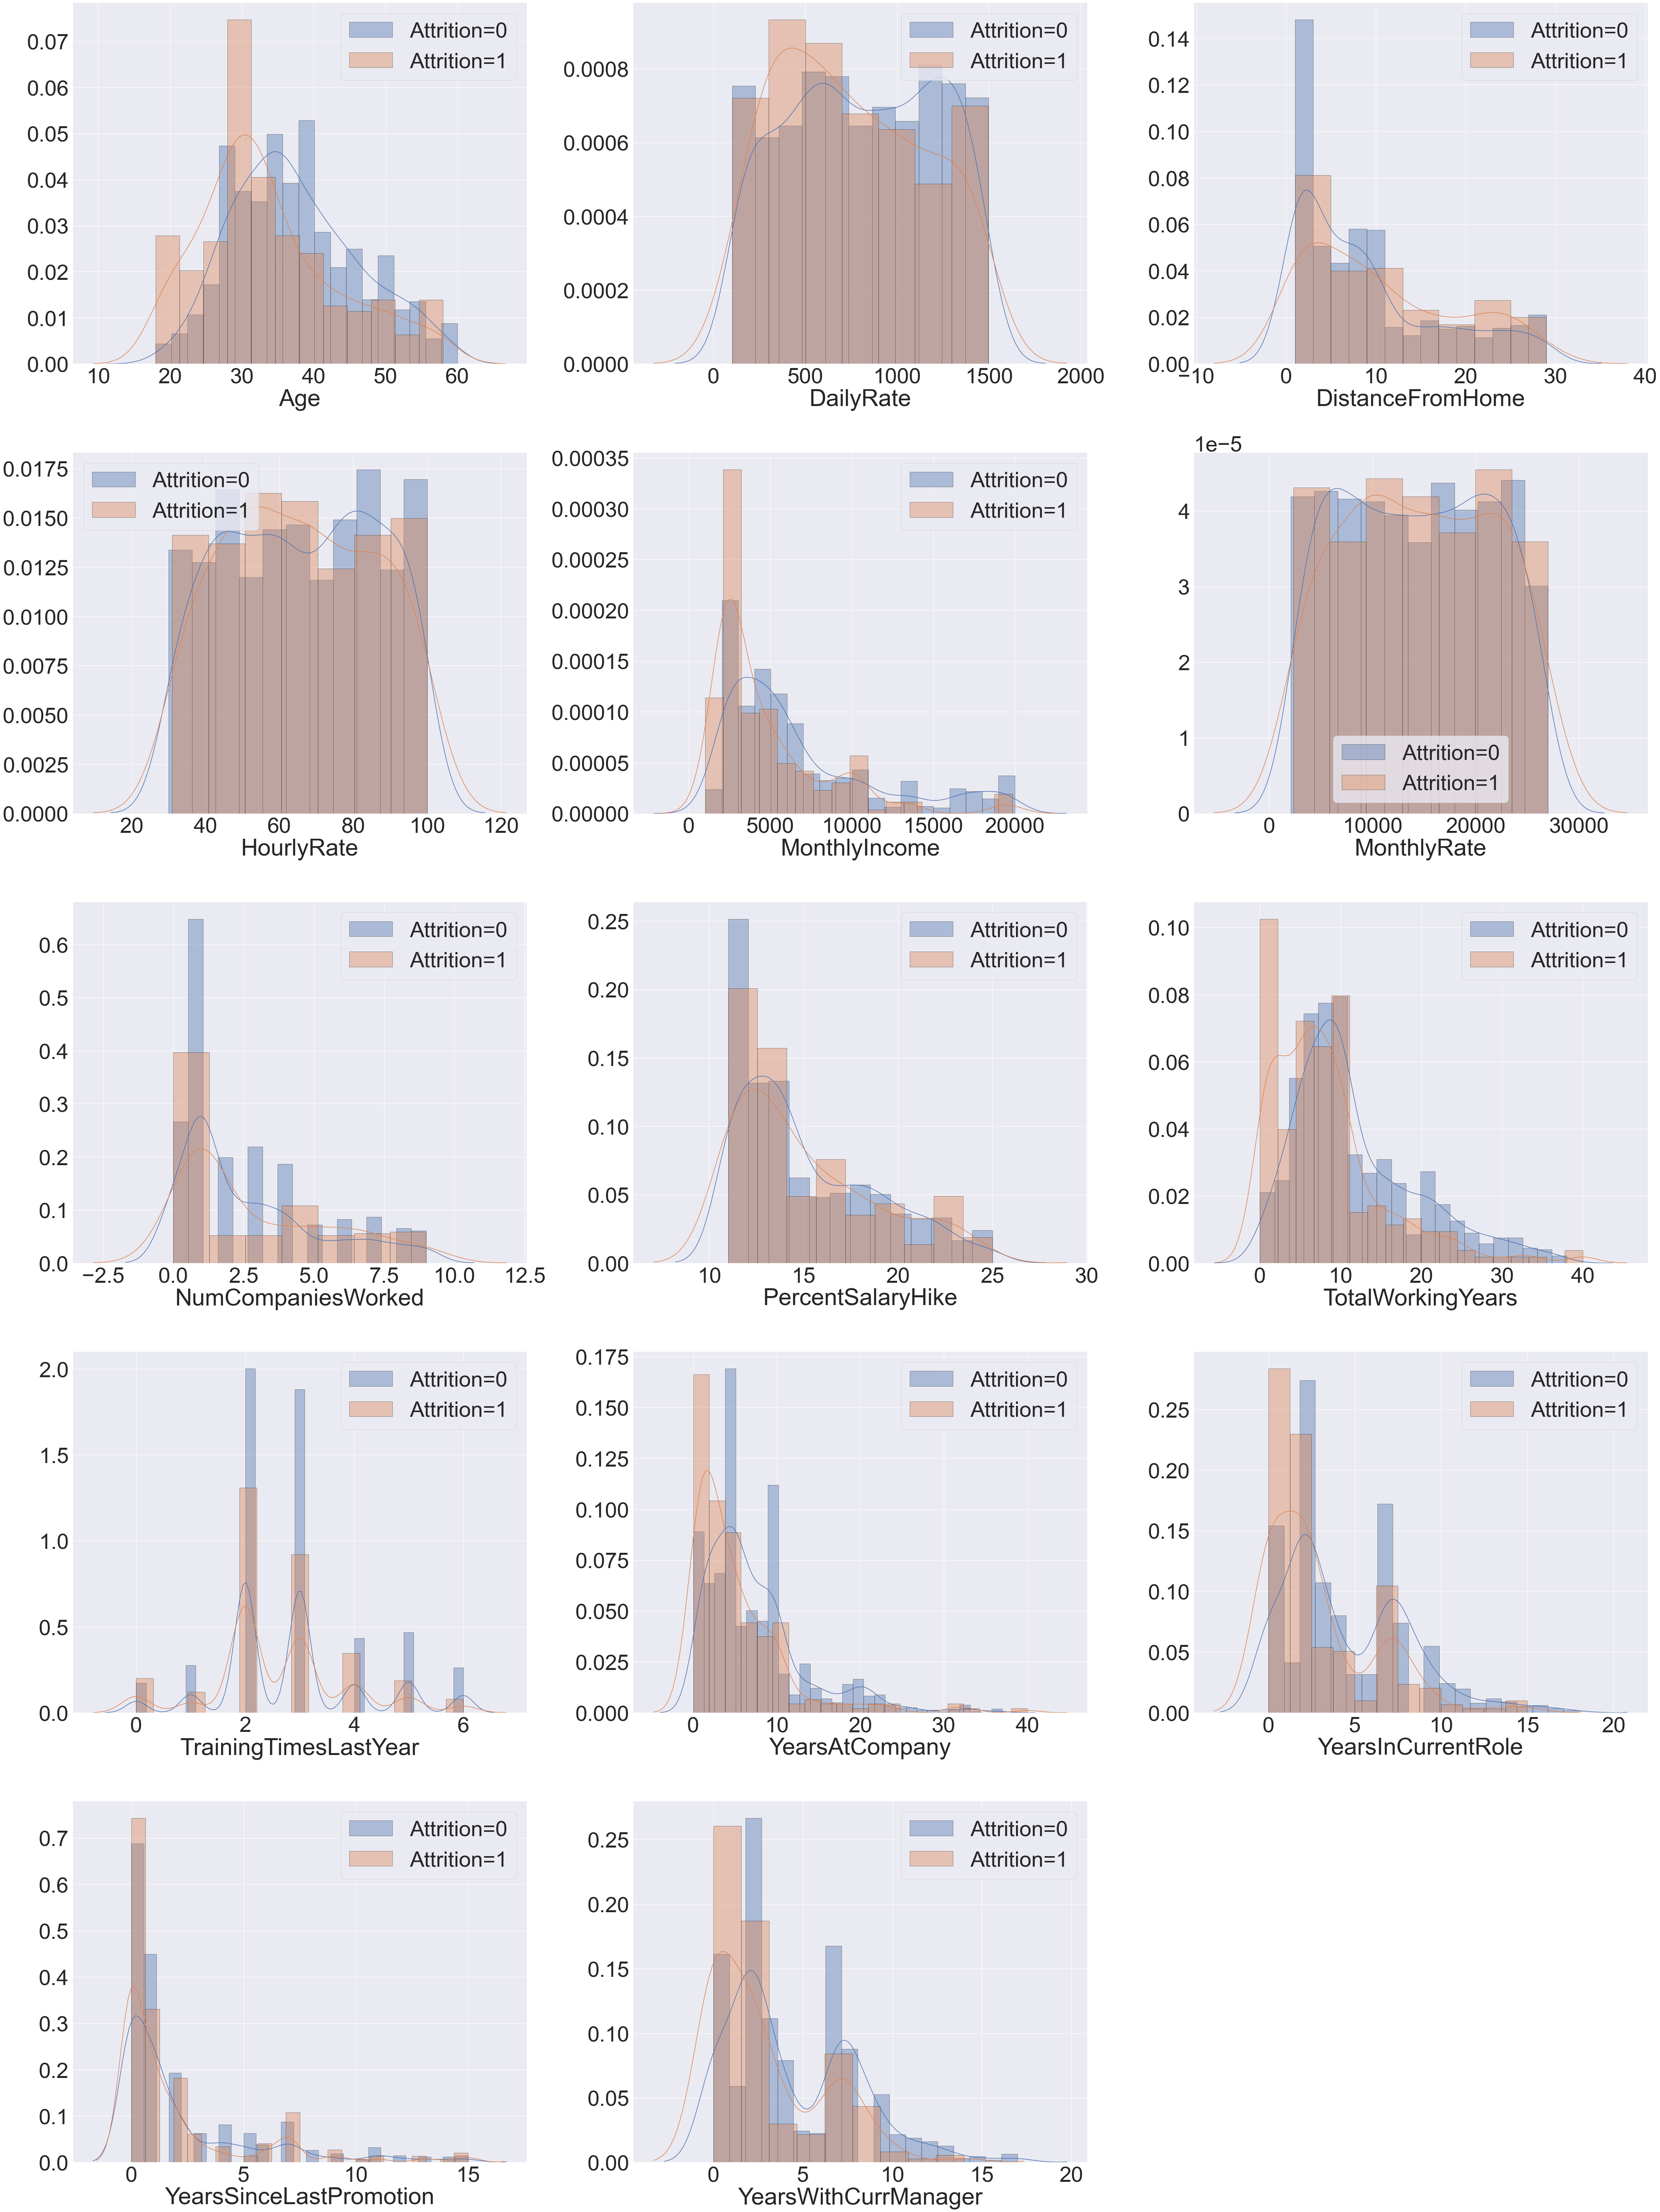

In [253]:
# Get numerical columns
num_col = []
for column in data.columns:
    if (data[column].dtype == int) and (column not in cat_col) and column != 'Attrition':
        num_col.append(column)
# Visualizing data in numerical columns
sns.set(font_scale=5)
plt.figure(figsize=(60, 80))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.4}
for i, column in enumerate(num_col, 1):
    plt.subplot(5, 3, i)
    g = sns.distplot(data[data['Attrition'] == 0][column], label='Attrition=0', hist_kws=hist_kws)
    g = sns.distplot(data[data['Attrition'] == 1][column], label='Attrition=1', hist_kws=hist_kws)
    g.legend()
    plt.xlabel(f'{column}')  
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

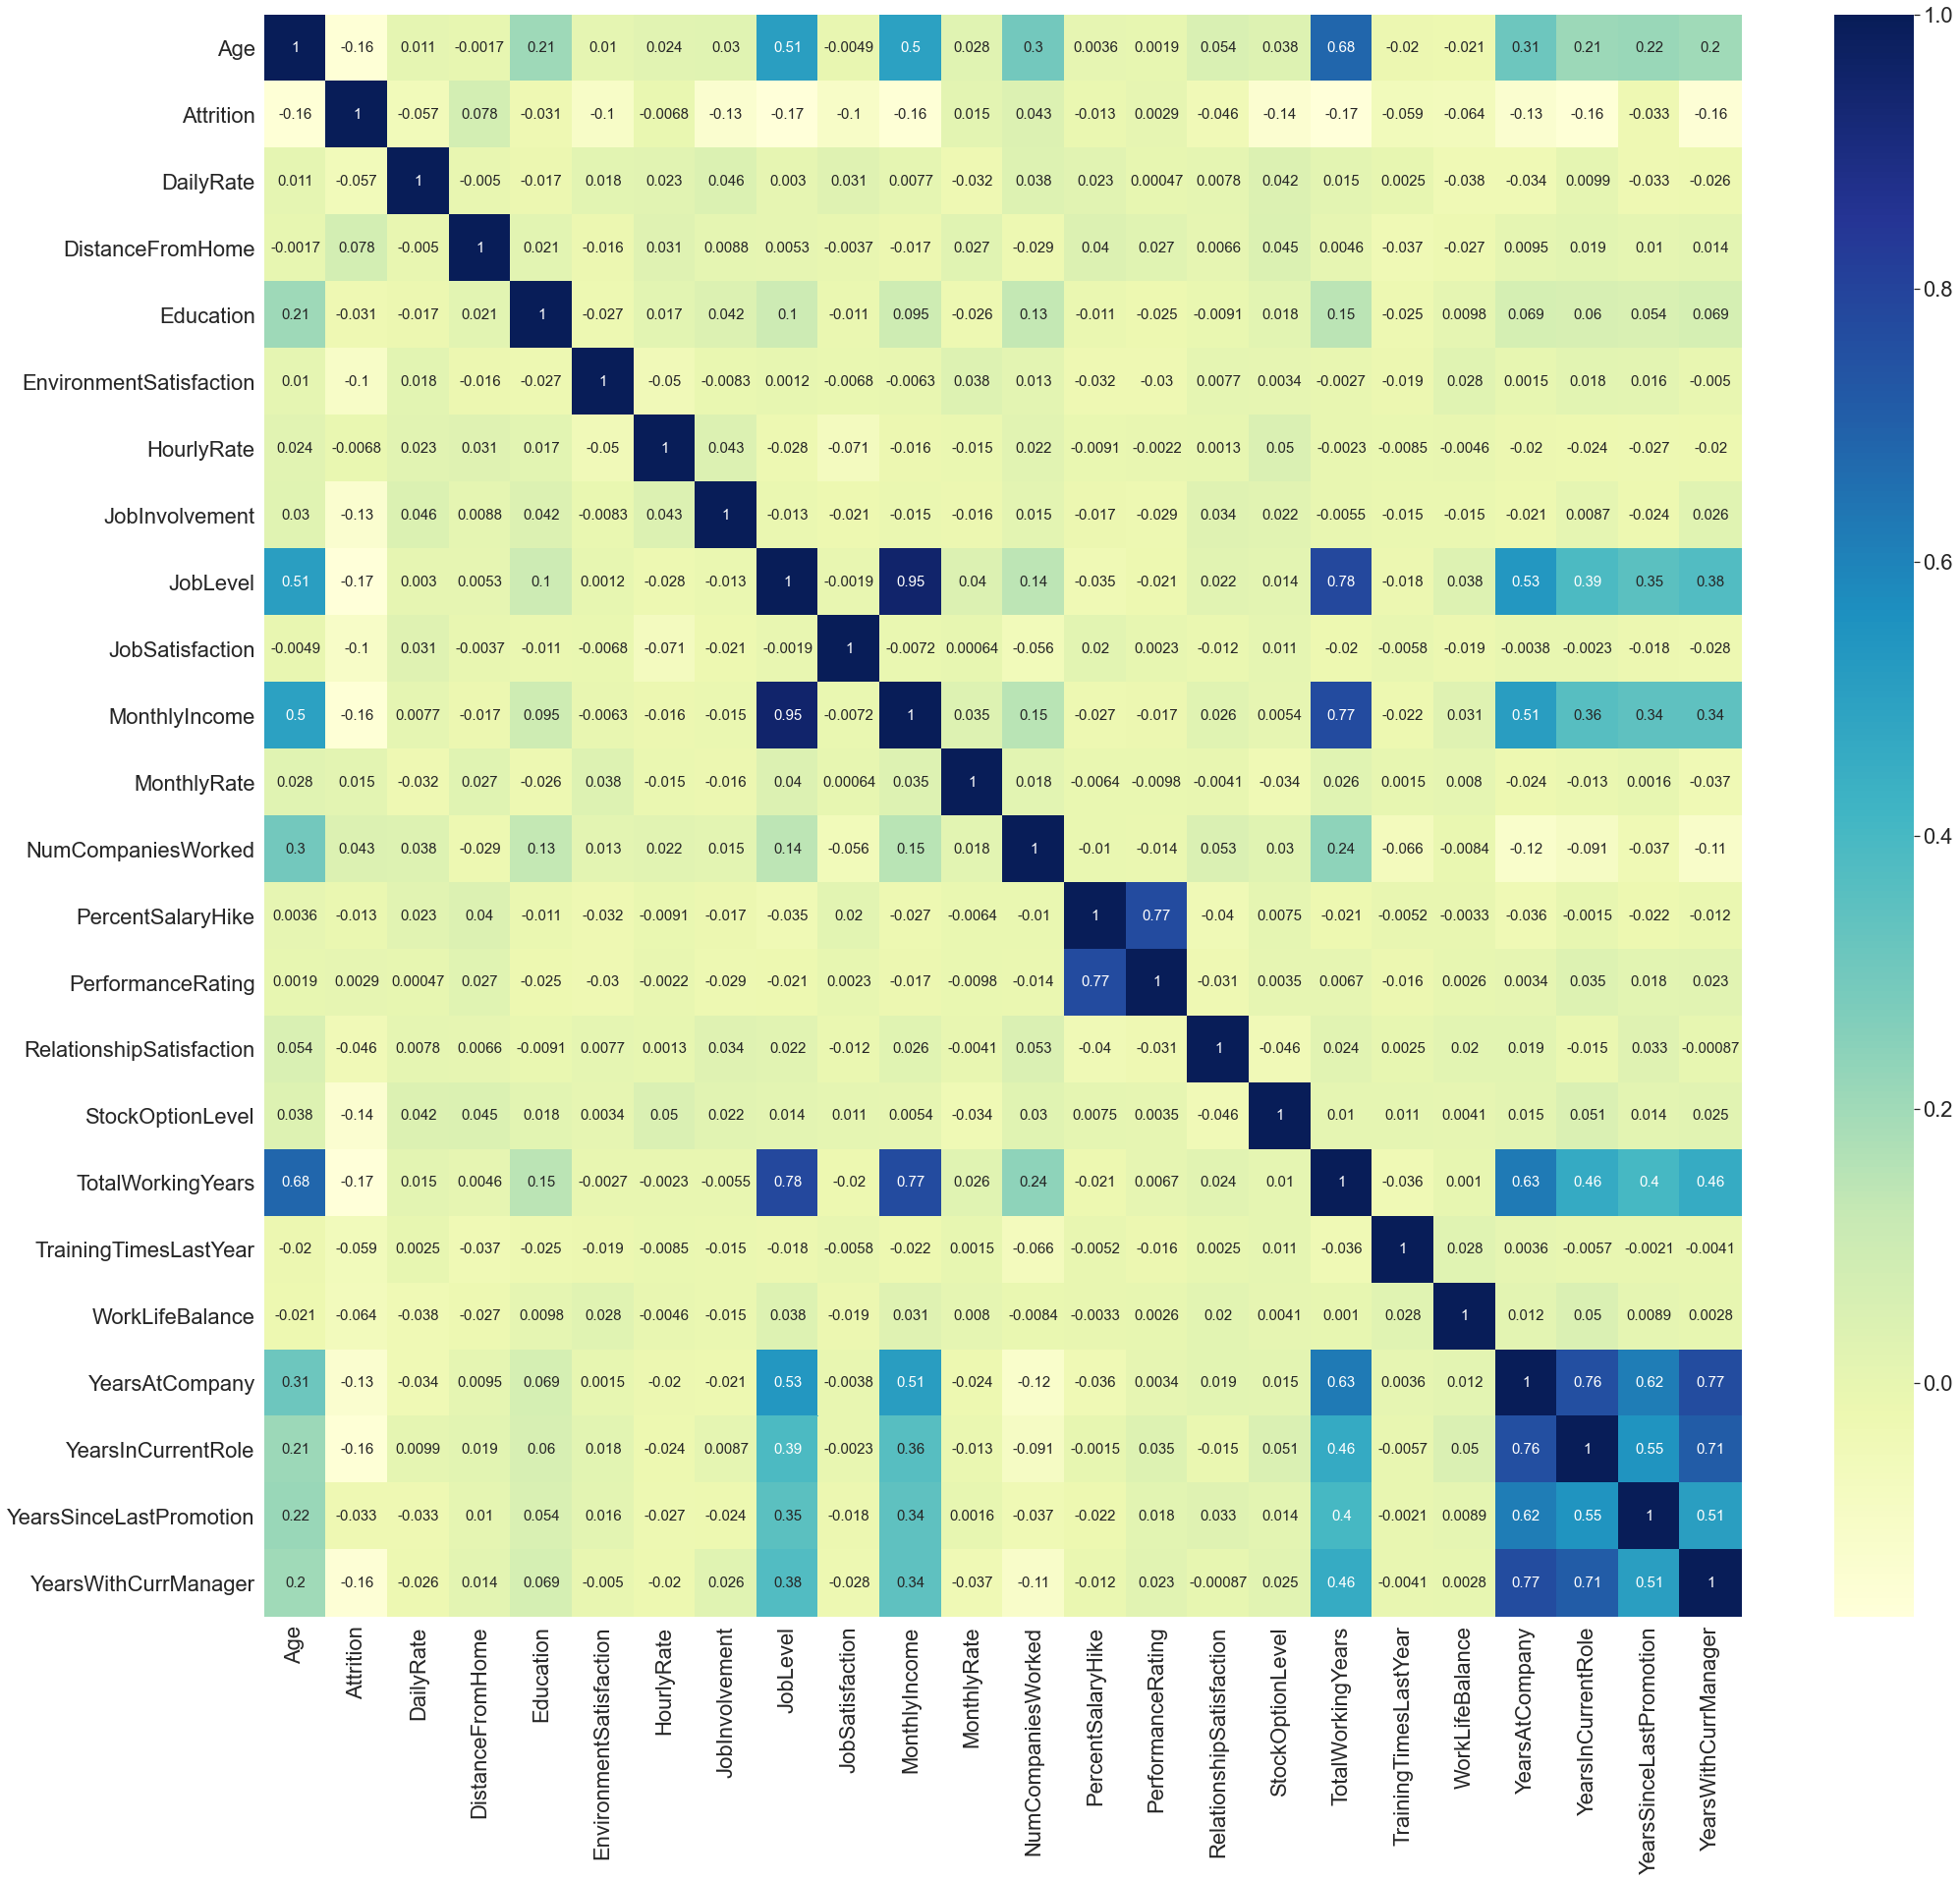

In [168]:
# Visualize the correlations among different features
sns.set(font_scale=2)
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":15})
plt.show

#### Insights from EDA
1. This is an imbalanced dataset. 84% of employees did not quit the organization while 16% did leave the organization.
2. `Gender` wise, `Male` has higher attrition than `Female`.
3. `MaritalStatus` indicates `Single` employees are more likely to leave than `Married` or `Divorced`.
4. Generation(`age`) wise, younger empoyees are more likely to leave. This is reflected in `age` distribution, where the distribution of employees who left is centered around 30 whereas the distribution of stayed employees has age centered around 35.
5. `Education` wise, employees with lower degree are more likely to leave, which is correlated with `age`. Enployees with `Human Resources`, `Technical Degree` and `Marketing` are more likely to leave than other education fields.
6. `Job Role` wise, employees in `Laboratory Technician`, `Sales Representative`, and `Human Resources` have high attritions than other job roles
7. `Department` wise, employees have high attritions in `Sales` and `Human Resources` departments, which is reflected in `Job Role` as well.
8. `BusinessTravel` seems affecting the attrition rate quite a bit. Employees who travel frequently has higher attrition rate. 
9. Employees who work `OverTime` and have lower `Worklifebalance` score are more likely to leave than others.
10. From the job environement and satisfaction perspectives, employees who have low scores in `EnviromentSatisfaction`, `JobSatisfaction` and `RelationshipSatisfaction` are more likely to leave.
11. From the `JobInvolvement` and `JobLevel` perspectives, employees feel less involved and are in lower job levels have higher attrition rate.
12. Employees with less `YearsAtCompany` or `YearsinCurrentRole` or `YearswithCurrentManager` are more likely to leave jobs, which also indicate strong correlations with `age`.
13. From the `StockOptionLevel` perspective, interestingly, employees with no stock options or with high stock options are more likely to leave.
14. Looking at the correlation matrix, we can draw some conclusions
    - The higher the total working years the higher the monthly income of an employee.
    - The higher the percent salary hike the higher the performance rating.
    - The higher the years with current manager the higher the years since last promotion.
    - The higher the age the higher the monthly income.

### 2. Build Machine Learning Model

In [396]:
# Import ML packages
from sklearn.metrics import auc, roc_curve, classification_report
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 43 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_yingwan_5znq02
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [403]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(data)
for name in cat_col:
    h2o_df[name] = h2o_df[name].asfactor()
#h2o_df['new_user'] = h2o_df['new_user'].asfactor()
h2o_df['Attrition'] = h2o_df['Attrition'].asfactor()
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
type,int,enum,enum,int,enum,int,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,int,int,int,enum,int,enum,enum,enum,int,int,enum,int,int,int,int
mins,18.0,,,102.0,,1.0,,,,,30.0,,,,,,1009.0,2094.0,0.0,,11.0,,,,0.0,0.0,,0.0,0.0,0.0,0.0
mean,36.92380952380955,,,802.4857142857132,,9.19251700680272,,,,,65.89115646258502,,,,,,6502.931292517012,14313.103401360513,2.6931972789115646,,15.209523809523821,,,,11.279591836734703,2.799319727891153,,7.008163265306127,4.229251700680271,2.187755102040815,4.123129251700682
maxs,60.0,,,1499.0,,29.0,,,,,100.0,,,,,,19999.0,26999.0,9.0,,25.0,,,,40.0,6.0,,40.0,18.0,15.0,17.0
sigma,9.13537348913673,,,403.509099943528,,8.10686443566608,,,,,20.329427593996176,,,,,,4707.956783097992,7117.786044059972,2.4980090060707467,,3.6599377165396385,,,,7.780781675514995,1.2892706207958466,,6.126525152403571,3.623137034670627,3.2224302791379693,3.5681361205404363
zeros,0,,,0,,0,,,,,0,,,,,,0,0,197,,0,,,,11,54,,44,244,581,263
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,2,Female,94.0,3,2,Sales Executive,4,Single,5993.0,19479.0,8.0,Yes,11.0,3,1,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49.0,0,Travel_Frequently,279.0,Research & Development,8.0,1,Life Sciences,3,Male,61.0,2,2,Research Scientist,2,Married,5130.0,24907.0,1.0,No,23.0,4,4,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37.0,1,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,4,Male,92.0,2,1,Laboratory Technician,3,Single,2090.0,2396.0,6.0,Yes,15.0,3,2,0,7.0,3.0,3,0.0,0.0,0.0,0.0


In [536]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['Attrition'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature_col = data.columns.tolist()
feature = feature_col.remove('Attrition')
target = 'Attrition'

In [570]:
# Build random forest model
sample_factors = [2.5, .5]
model = H2ORandomForestEstimator(balance_classes=True, class_sampling_factors=sample_factors, 
                                 ntrees=100, max_depth=12, mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [571]:
# Make predictions
train_true = train.as_data_frame()['Attrition'].values
test_true = test.as_data_frame()['Attrition'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values
train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [572]:
# Classification report
print(train_auc)
print(test_auc)
#print(test_true == (test_pred > 0.5))
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

0.966
0.891
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       308
           1       0.57      0.54      0.56        59

    accuracy                           0.86       367
   macro avg       0.74      0.73      0.74       367
weighted avg       0.86      0.86      0.86       367



In [573]:
len([item for item in (train_pred>0.5) if item == True])
#len([item for item in (train_true>0.5) if item == True])
#print(train_pred>0.5)

124

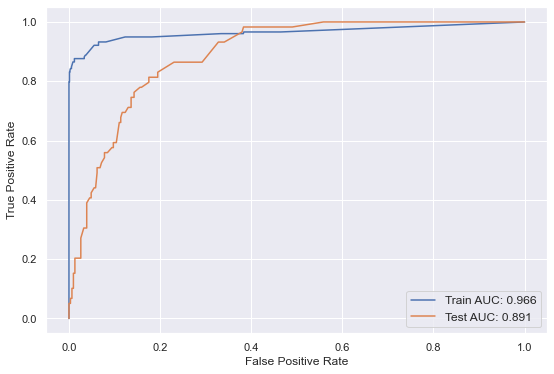

In [574]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

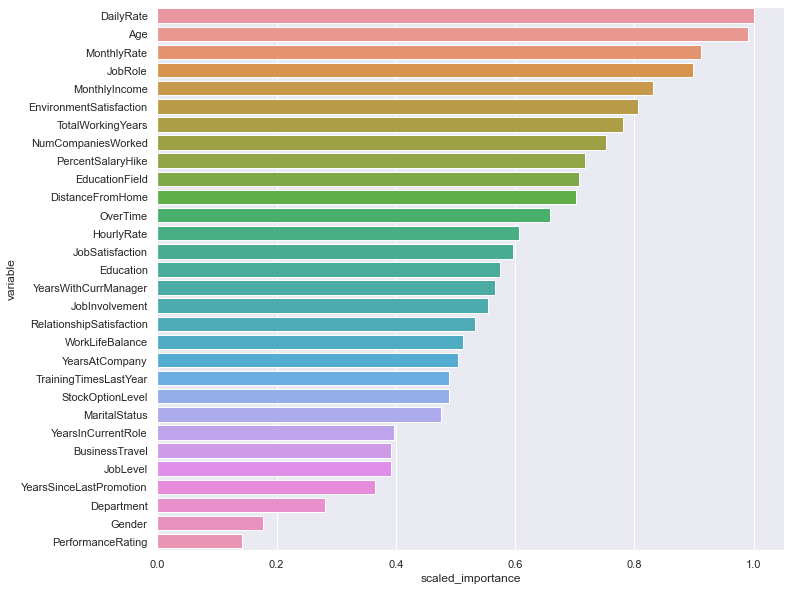

In [575]:
# Feature importance
importance = model.varimp(use_pandas=True)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


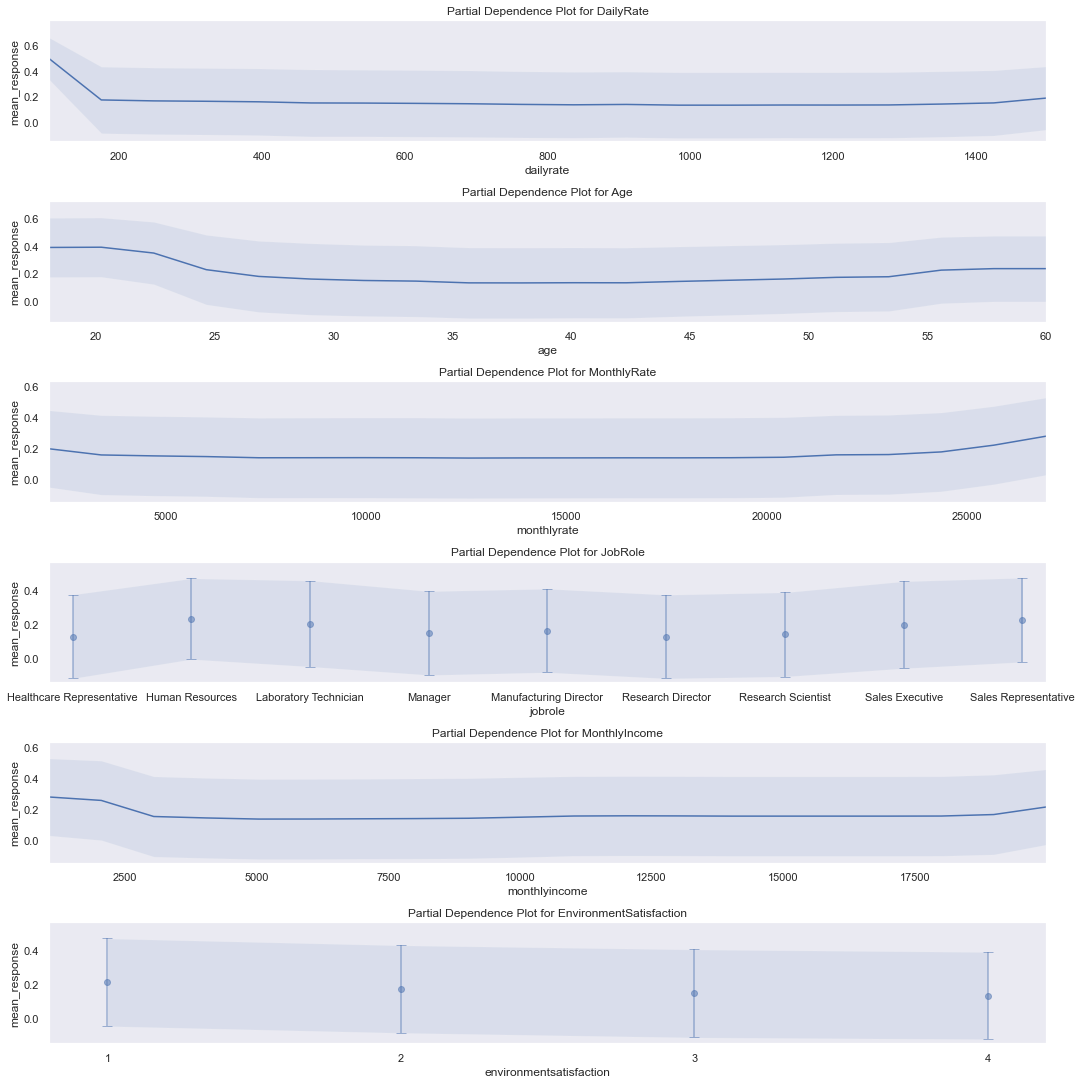

In [577]:
cols = ['DailyRate', 'Age', 'MonthlyRate', 'JobRole', 'MonthlyIncome', 'EnvironmentSatisfaction']
_ = model.partial_plot(train, cols=cols, figsize=(15, 15))

If there is sufficient time, more work can be done in trying out other Machine Learning algorithms and feature engineering like removing colinear features and focusing on more important features.

In [578]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

#data = data.drop(columns = to_drop)

to_drop

There are 1 columns to remove :


['MonthlyIncome']